In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt

In [43]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
diabetes.duplicated().sum()

0

In [48]:
#show the correlation between data
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

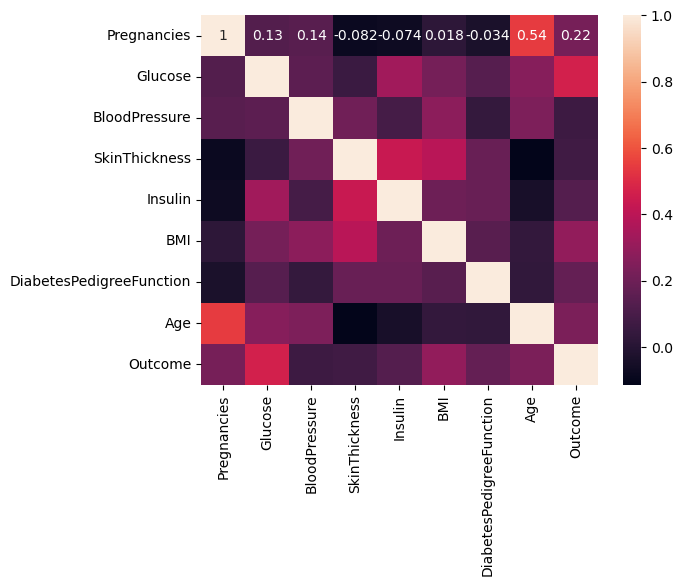

In [49]:
#heat map for colleration var
corelation_matrix = diabetes.corr()
corelation_matrix

sn.heatmap(corelation_matrix,annot = True)

In [50]:
X = diabetes.drop('Outcome', axis = 1)
y= diabetes['Outcome']

In [51]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [52]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,shuffle=True)

In [54]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


In [55]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\seife\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:

print('Predicted Value for classification is : ' , y_pred[:5])
print ('ground truth is : ' , y_test[:5])

Predicted Value for classification is :  [1 0 0 0 0]
ground truth is :  568    0
620    0
456    0
197    1
714    0
Name: Outcome, dtype: int64


In [57]:
# Ensure y_pred and y_test are flattened NumPy arrays
y_pred_flat = y_pred.flatten() if isinstance(y_pred, np.ndarray) else y_pred.to_numpy().flatten()
y_test_flat = y_test.flatten() if isinstance(y_test, np.ndarray) else y_test.to_numpy().flatten()

dff = pd.DataFrame(data = {
    'predicted value': y_pred_flat, 
    'actual value': y_test_flat
})

In [58]:
dff.head(15)

,predicted value,actual value
0,1,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


In [62]:
# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='weighted'))
#print(metrics.ConfusionMatrixDisplay(y_test,y_pred,))

Accuracy: 0.7402597402597403
Precision: 0.7383964084791833
Recall: 0.7402597402597403
F1 Score: 0.7268606198725844


In [63]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.73      0.49      0.59        87

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Predict with the Decision Tree model
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")

Decision Tree Accuracy: 0.7056277056277056


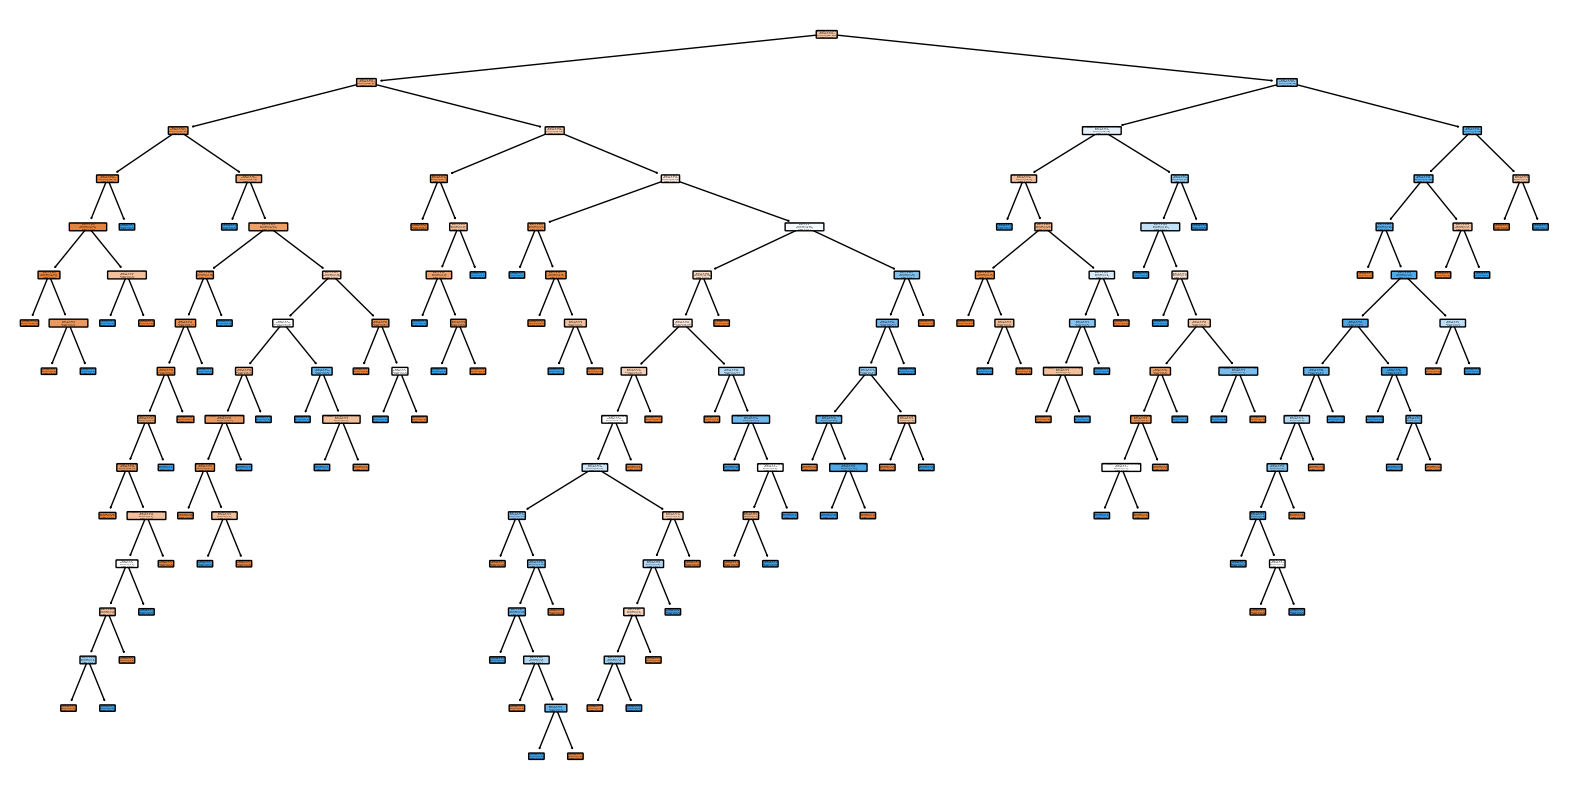

In [65]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the size of the figure as needed
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()